In [5]:
## Data Preprocessing 

In [6]:
import numpy as np

In [7]:
import matplotlib.pyplot as plt 

In [8]:
import pandas as pd

In [11]:
df=pd.read_csv("Churn_Modelling.csv")

In [12]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [19]:
X=df.loc[:2]

In [22]:
X=df[['CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary']]

In [26]:
Xx=X.values

In [28]:

Xx

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [32]:

Y=df['Exited'].values

In [33]:
Y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [35]:
#Encoding categrical data > it can be easly done with pandas , find how >?

In [36]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [37]:
labelencodin_X_1=LabelEncoder()

In [39]:
Xx[:,1]=labelencodin_X_1.fit_transform(Xx[:,1])  #[:]-> select every thing in 

In [40]:
Xx

array([[619, 0, 'Female', ..., 1, 1, 101348.88],
       [608, 2, 'Female', ..., 0, 1, 112542.58],
       [502, 0, 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 0, 'Female', ..., 0, 1, 42085.58],
       [772, 1, 'Male', ..., 1, 0, 92888.52],
       [792, 0, 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [47]:
labelencodin_X_2=LabelEncoder()

array([2, 1, 8, ..., 7, 3, 4], dtype=object)

In [48]:
Xx[:,2]=labelencodin_X_1.fit_transform(Xx[:,2])

In [52]:
pd.DataFrame(Xx).head(10)

,0,1,2,3,4,5,6,7,8,9
0,619,0,0,42,2,0,1,1,1,101349
1,608,2,0,41,1,83807.9,1,0,1,112543
2,502,0,0,42,8,159661,3,1,0,113932
3,699,0,0,39,1,0,2,0,0,93826.6
4,850,2,0,43,2,125511,1,1,1,79084.1
5,645,2,1,44,8,113756,2,1,0,149757
6,822,0,1,50,7,0,2,1,1,10062.8
7,376,1,0,29,4,115047,4,1,0,119347
8,501,0,1,44,4,142051,2,0,1,74940.5
9,684,0,1,27,2,134604,1,1,1,71725.7


In [57]:
onhotencoder=OneHotEncoder(categorical_features=[1])
## onhotencoder xhanve the values of categroical varable > Geograpgy and gender into three coumns > for franch , germany, spain> 0,0,0 if value is present 1 else 0
Xx=onhotencoder.fit_transform(Xx).toarray()

C:\Users\amit_rai\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [58]:
pd.DataFrame(Xx).head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,0.0,1.0,0.0,619.0,0.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88
1,1.0,0.0,0.0,1.0,608.0,0.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58
2,1.0,0.0,1.0,0.0,502.0,0.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57
3,1.0,0.0,1.0,0.0,699.0,0.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63
4,1.0,0.0,0.0,1.0,850.0,0.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10
5,1.0,0.0,0.0,1.0,645.0,1.0,44.0,8.0,113755.78,2.0,1.0,0.0,149756.71
6,1.0,0.0,1.0,0.0,822.0,1.0,50.0,7.0,0.00,2.0,1.0,1.0,10062.80
7,0.0,1.0,0.0,0.0,376.0,0.0,29.0,4.0,115046.74,4.0,1.0,0.0,119346.88
8,1.0,0.0,1.0,0.0,501.0,1.0,44.0,4.0,142051.07,2.0,0.0,1.0,74940.50
9,1.0,0.0,1.0,0.0,684.0,1.0,27.0,2.0,134603.88,1.0,1.0,1.0,71725.73


In [59]:
## to avoid dummy variable trap we will drop the first colums 

In [65]:
Xx=Xx[:,1:]

In [67]:
pd.DataFrame(Xx).head(10)

,0,1,2,3,4,5,6,7,8,9,10
0,1.0,0.0,619.0,0.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88
1,0.0,1.0,608.0,0.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58
2,1.0,0.0,502.0,0.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57
3,1.0,0.0,699.0,0.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63
4,0.0,1.0,850.0,0.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10
5,0.0,1.0,645.0,1.0,44.0,8.0,113755.78,2.0,1.0,0.0,149756.71
6,1.0,0.0,822.0,1.0,50.0,7.0,0.00,2.0,1.0,1.0,10062.80
7,0.0,0.0,376.0,0.0,29.0,4.0,115046.74,4.0,1.0,0.0,119346.88
8,1.0,0.0,501.0,1.0,44.0,4.0,142051.07,2.0,0.0,1.0,74940.50
9,1.0,0.0,684.0,1.0,27.0,2.0,134603.88,1.0,1.0,1.0,71725.73


In [72]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Xx,Y,test_size=0.33, random_state=0)

In [74]:
#Feature Scaling


In [75]:
from sklearn.preprocessing import StandardScaler

In [77]:
sc=StandardScaler()

In [78]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [81]:
pd.DataFrame(X_train).head(5)

,0,1,2,3,4,5,6,7,8,9,10
0,0.986067,-0.574363,-1.784519,0.922404,-1.614098,0.004130,0.116103,0.805089,-1.562997,-1.033393,1.089059
1,0.986067,-0.574363,1.474017,-1.084124,0.208601,0.695912,-1.199930,0.805089,0.639796,0.967686,-0.455190
2,0.986067,-0.574363,-0.828545,0.922404,-0.654783,1.387694,0.670481,0.805089,-1.562997,0.967686,-0.654469
3,0.986067,-0.574363,1.042286,0.922404,0.016738,-0.687652,-1.199930,-0.932140,0.639796,-1.033393,1.524918
4,0.986067,-0.574363,-0.088436,0.922404,-0.271057,-0.341761,-1.199930,0.805089,0.639796,0.967686,1.647255


In [82]:
pd.DataFrame(X_test).head(5)

,0,1,2,3,4,5,6,7,8,9,10
0,-1.014130,-0.574363,-0.551004,-1.084124,-0.366988,1.041803,0.889877,-0.932140,0.639796,0.967686,1.606019
1,0.986067,-0.574363,-1.311671,-1.084124,0.112669,-1.033543,0.441415,-0.932140,0.639796,-1.033393,0.490903
2,-1.014130,1.741059,0.569439,-1.084124,0.304532,1.041803,0.320577,-0.932140,0.639796,0.967686,-0.429861
3,0.986067,-0.574363,1.412341,0.922404,-0.654783,-0.341761,0.586667,-0.932140,-1.562997,-1.033393,-0.192823
4,-1.014130,-0.574363,0.569439,0.922404,-0.079194,0.004130,1.398916,0.805089,0.639796,0.967686,0.611889


In [83]:
import keras

Using TensorFlow backend.


In [87]:
from keras.models import Sequential

In [88]:
from keras.layers import Dense

In [89]:
classfier=Sequential()

In [91]:
def imgReadShow(path):
    import cv2
    import matplotlib.pyplot as plt
    img=cv2.imread(path)
    plt.figure(figsize=(15,15))
    plt.imshow(img)
    

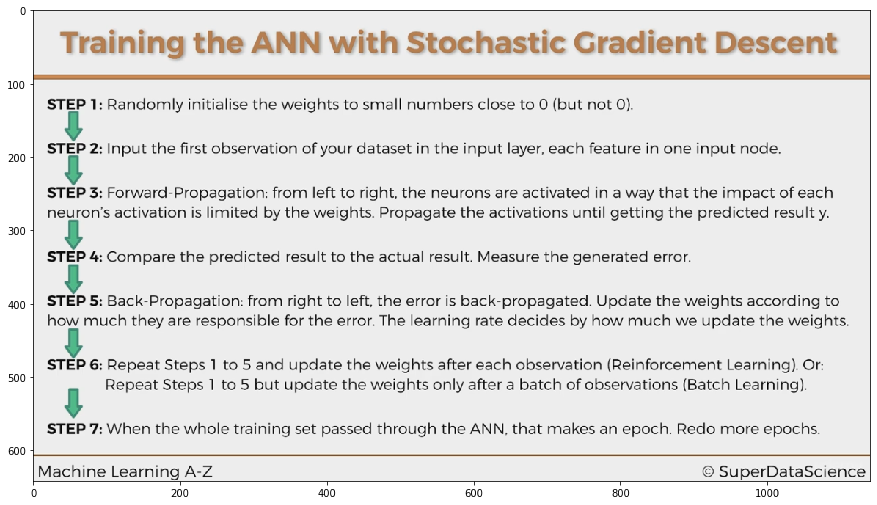

In [92]:
imgReadShow("./ANN steps.png")

In [93]:
#adding the input layers
    #units,--> 
    #activation=None,-->
    #use_bias=True,-->
    #kernel_initializer='glorot_uniform',-->
    #bias_initializer='zeros',-->
    #kernel_regularizer=None,-->
    #bias_regularizer=None,-->
    #activity_regularizer=None,-->
    #kernel_constraint=None,-->
    #bias_constraint=None,-->
    #**kwargs,==>

classfier.add(Dense(output_dim=6,init="uniform",activation="relu",input_dim=11))   

C:\Users\amit_rai\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=11, units=6, kernel_initializer="uniform")`
  
W0809 22:24:21.115467  5104 deprecation_wrapper.py:119] From C:\Users\amit_rai\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0809 22:24:21.150468  5104 deprecation_wrapper.py:119] From C:\Users\amit_rai\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [94]:
classfier.add(Dense(output_dim=6,init="uniform",activation="relu"))   

C:\Users\amit_rai\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.


In [95]:
classfier.add(Dense(output_dim=1,init="uniform",activation="sigmoid"))   

C:\Users\amit_rai\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.


In [98]:
classfier.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [101]:
classfier.fit(X_train,y_train,batch_size=15,nb_epoch=50)

Epoch 1/50
 930/6700 [===>..........................] - ETA: 0s - loss: 0.3690 - acc: 0.8462

C:\Users\amit_rai\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


6700/6700 [==============================] - 1s 119us/step - loss: 0.3943 - acc: 0.8349
Epoch 2/50
6700/6700 [==============================] - 1s 105us/step - loss: 0.3946 - acc: 0.8364
Epoch 3/50
6700/6700 [==============================] - 1s 104us/step - loss: 0.3942 - acc: 0.8361
Epoch 4/50
6700/6700 [==============================] - 1s 103us/step - loss: 0.3946 - acc: 0.8372
Epoch 5/50
6700/6700 [==============================] - 1s 105us/step - loss: 0.3950 - acc: 0.8357
Epoch 6/50
6700/6700 [==============================] - 1s 104us/step - loss: 0.3946 - acc: 0.8372
Epoch 7/50
6700/6700 [==============================] - 1s 104us/step - loss: 0.3950 - acc: 0.8364
Epoch 8/50
6700/6700 [==============================] - 1s 105us/step - loss: 0.3950 - acc: 0.8367
Epoch 9/50
6700/6700 [==============================] - 1s 104us/step - loss: 0.3949 - acc: 0.8358
Epoch 10/50
6700/6700 [==============================] - 1s 110us/step - loss: 0.3948 - acc: 0.8361
Epoch 11/50
6700/670

In [102]:
y_pred=classfier.predict(X_test)

In [110]:
pd.DataFrame(y_pred).head(5)

,0
0,0.274240
1,0.329924
2,0.197939
3,0.073061
4,0.198423


In [111]:
# we cant passs probablity in the confusion metrix , so we need to pass convert ypred to true of false, using thresh hold vakluse
y_pred=(y_pred>0.5)

In [113]:

from sklearn.metrics import confusion_matrix

In [114]:
cm=confusion_matrix(y_test,y_pred)

In [116]:
pd.DataFrame(cm,index=["positive","negitive"],columns=["positive","negitive"])

,positive,negitive
positive,2524,93
negitive,433,250


In [122]:
from sklearn.metrics import accuracy_score

In [124]:
accuracy_score(y_test,y_pred)

0.8406060606060606